In [ ]:
from google.colab import auth
import gspread
from google.auth import default

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential as Seq
from tensorflow.keras.layers import Dense as Den
from tensorflow.keras.metrics import RootMeanSquaredError as rmse


In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open("DL ex 1").sheet1
rows=worksheet.get_all_values()

In [ ]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'Input':'int'})
df = df.astype({'Output':'int'})
print(df)


    Input  Output
0       1       8
1       2      14
2       3      20
3       4      26
4       5      32
5       6      38
6       7      44
7       8      50
8       9      56
9      10      62
10     11      68
11     12      74
12     13      80
13     14      86
14     15      92
15     16      98
16     17     104
17     18     110
18     19     116
19     20     122


In [ ]:
df.head()


,Input,Output
0,1,8
1,2,14
2,3,20
3,4,26
4,5,32


In [ ]:
 x = df[["Input"]] .values
 y = df[["Output"]].values

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x)
x_n = scaler.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_n,y,test_size = 0.3,random_state = 3)
print(x_train)
print(x_test)

[[0.31578947]
 [0.36842105]
 [0.78947368]
 [0.63157895]
 [0.47368421]
 [0.57894737]
 [1.        ]
 [0.94736842]
 [0.68421053]
 [0.26315789]
 [0.        ]
 [0.42105263]
 [0.15789474]
 [0.52631579]]
[[0.73684211]
 [0.10526316]
 [0.05263158]
 [0.89473684]
 [0.21052632]
 [0.84210526]]


In [ ]:
from tensorflow.keras.models import Sequential as Seq
from tensorflow.keras.layers import Dense as Den
from tensorflow.keras.metrics import RootMeanSquaredError as rmse
model = Seq([
Den(4,activation = 'relu',input_shape=[1]),
Den(6),
Den(3,activation = 'relu'),
Den(1),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 8         
                                                                 
 dense_5 (Dense)             (None, 6)                 30        
                                                                 
 dense_6 (Dense)             (None, 3)                 21        
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
Total params: 63 (252.00 Byte)
Trainable params: 63 (252.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
 model.compile(optimizer = 'rmsprop',loss = 'mse')
 model.fit(x_train,y_train,epochs=20)
 model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1/1 [==============================] - 1s 742ms/step - loss: 5394.5312
Epoch 2/20
1/1 [==============================] - 0s 11ms/step - loss: 5392.8232
Epoch 3/20
1/1 [==============================] - 0s 11ms/step - loss: 5391.6128
Epoch 4/20
1/1 [==============================] - 0s 9ms/step - loss: 5390.6323
Epoch 5/20
1/1 [==============================] - 0s 10ms/step - loss: 5389.7900
Epoch 6/20
1/1 [==============================] - 0s 10ms/step - loss: 5389.0859
Epoch 7/20
1/1 [==============================] - 0s 10ms/step - loss: 5388.4741
Epoch 8/20
1/1 [==============================] - 0s 9ms/step - loss: 5387.9429
Epoch 9/20
1/1 [==============================] - 0s 9ms/step - loss: 5387.4844
Epoch 10/20
1/1 [==============================] - 0s 9ms/step - loss: 5387.0952
Epoch 11/20
1/1 [==============================] - 0s 8ms/step - loss: 5386.7847
Epoch 12/20
1/1 [==============================] - 0s 9ms/step - loss: 5386.5234
Epoch 13/20
1/1 [=============

<Axes: >

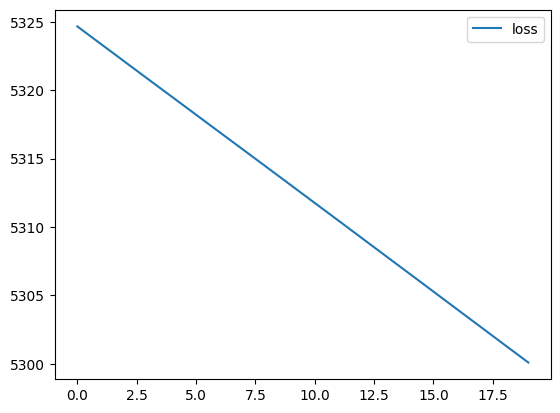

In [ ]:
loss_plot = pd.DataFrame(model.history.history)
loss_plot.plot()


In [ ]:
 err = rmse()
 preds = model.predict(x_test)
 err(y_test,preds)

1/1 [==============================] - 0s 71ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=73.5562>

In [ ]:
 x_n1 = [[30]]
 x_n_n = scaler.transform(x_n1)
 model.predict(x_n_n)

1/1 [==============================] - 0s 22ms/step


array([[1.2861449]], dtype=float32)

In [ ]:
y_pred=model.predict(x_test)
y_pred

1/1 [==============================] - 0s 137ms/step


array([[0.04906746],
       [0.04906746],
       [0.04906746],
       [0.04906746],
       [0.04906746],
       [0.04906746]], dtype=float32)